# Heatmaps

In [2]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Simulate embeddings for 3 classes, 10 samples each (30 total)
num_classes = 3
samples_per_class = 3
embedding_dim = 10

# For simplicity, assign similar embeddings to same class using normal distribution
torch.manual_seed(42)
embeddings = []
for c in range(num_classes):
    class_emb = torch.randn(samples_per_class, embedding_dim) + (c)
    embeddings.append(class_emb)
embeddings = torch.vstack(embeddings)  # Shape: [30, dim]

# Normalize embeddings
embeddings = embeddings / embeddings.norm(dim=1, keepdim=True)

# Compute cosine similarity matrix
cos_sim_matrix = torch.matmul(embeddings, embeddings.T).cpu().numpy()  # shape: (30, 30)

# Create class labels for axis annotation
labels = [f"C{c+1}" for c in range(num_classes) for _ in range(samples_per_class)]



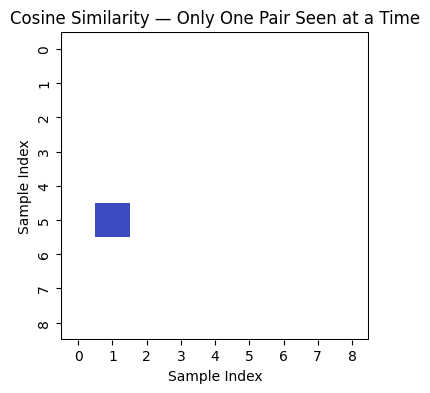

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

pair_i, pair_j = 5, 1
mask = np.ones_like(cos_sim_matrix)
mask[pair_i, pair_j] = 0
# mask[pair_j, pair_i] = 0

plt.figure(figsize=(5, 4))
ax = sns.heatmap(cos_sim_matrix, mask=mask, cmap="coolwarm", square=True, cbar=False)
plt.title("Cosine Similarity — Only One Pair Seen at a Time")
plt.xlabel("Sample Index")
plt.ylabel("Sample Index")

# Add a rectangle around the heatmap
ax.add_patch(plt.Rectangle((0, 0), len(cos_sim_matrix), len(cos_sim_matrix), fill=False, edgecolor='black', lw=1.5))

plt.show()

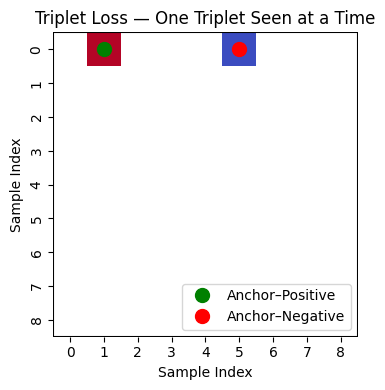

In [4]:
anchor, positive, negative = 0, 1, 5
mask = np.ones_like(cos_sim_matrix, dtype=bool)
mask[anchor, positive] = False
# mask[positive, anchor] = False
mask[anchor, negative] = False
# mask[negative, anchor] = False

plt.figure(figsize=(5, 4))
ax = sns.heatmap(cos_sim_matrix, mask=mask, cmap="coolwarm", square=True, cbar=False)

# Highlight the active triplet entries
ax.plot(positive + 0.5, anchor + 0.5, 'go', markersize=10, label="Anchor–Positive")  # Green
# ax.plot(anchor + 0.5, positive + 0.5, 'go', markersize=10)
ax.plot(negative + 0.5, anchor + 0.5, 'ro', markersize=10, label="Anchor–Negative")  # Red
# ax.plot(anchor + 0.5, negative + 0.5, 'ro', markersize=10)

# Rectangle around heatmap
ax.add_patch(plt.Rectangle((0, 0), cos_sim_matrix.shape[0], cos_sim_matrix.shape[1],
                           fill=False, edgecolor='black', lw=1.5))

plt.title("Triplet Loss — One Triplet Seen at a Time")
plt.legend(loc="lower right")
plt.xlabel("Sample Index")
plt.ylabel("Sample Index")
plt.tight_layout()
plt.show()

C:\Users\adity\AppData\Local\Temp\ipykernel_36360\1868355641.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  cos_sim_matrix = np.dot(embeddings, embeddings.T)


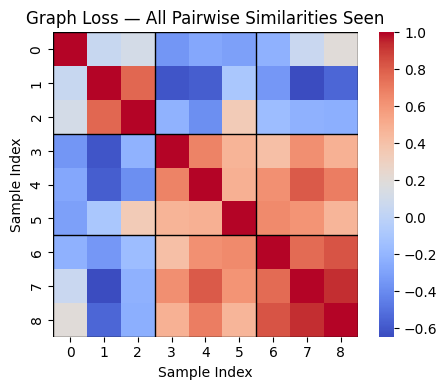

In [5]:
cos_sim_matrix = np.dot(embeddings, embeddings.T)

# --- Plot full heatmap without masking ---
plt.figure(figsize=(5, 4))
ax = sns.heatmap(cos_sim_matrix, cmap="coolwarm", square=True, cbar=True)

# Draw grid lines to separate classes
for i in range(0, 31, samples_per_class):
    ax.axhline(i, color='black', lw=1)
    ax.axvline(i, color='black', lw=1)

plt.title("Graph Loss — All Pairwise Similarities Seen")
plt.xlabel("Sample Index")
plt.ylabel("Sample Index")
plt.tight_layout()
plt.show()

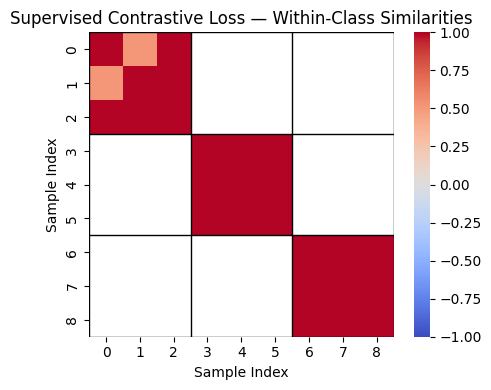

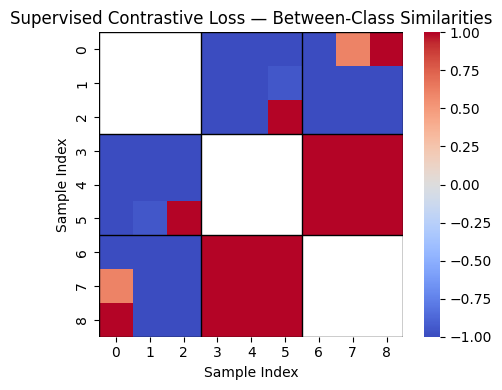

In [6]:
# Create a mask to highlight within-class similarities
# The mask will be True for pairs within the same class and False for pairs from different classes
labels_np = np.array([c for c in range(num_classes) for _ in range(samples_per_class)])
mask_within_class = (labels_np[:, None] == labels_np[None, :])
temperature=0.1
similarity = torch.div(
    torch.matmul(embeddings, embeddings.T),
    temperature
)


plt.figure(figsize=(5, 4))
ax = sns.heatmap(similarity, mask=~mask_within_class, cmap="coolwarm", square=True, cbar=True, vmin=-1, vmax=1)

# Draw grid lines to separate classes
for i in range(0, num_classes * samples_per_class + 1, samples_per_class):
    ax.axhline(i, color='black', lw=1)
    ax.axvline(i, color='black', lw=1)

plt.title("Supervised Contrastive Loss — Within-Class Similarities")
plt.xlabel("Sample Index")
plt.ylabel("Sample Index")
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 4))
ax = sns.heatmap(similarity, mask=mask_within_class, cmap="coolwarm", square=True, cbar=True, vmin=-1, vmax=1)

# Draw grid lines to separate classes
for i in range(0, num_classes * samples_per_class + 1, samples_per_class):
    ax.axhline(i, color='black', lw=1)
    ax.axvline(i, color='black', lw=1)

plt.title("Supervised Contrastive Loss — Between-Class Similarities")
plt.xlabel("Sample Index")
plt.ylabel("Sample Index")
plt.tight_layout()
plt.show()